Maverick P. Rojo

CPE32S8

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.6/78.2 GB disk)


In [3]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ww3KCBLeULTEUfiLRqvo")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
version = project.version(61)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
%cat {dataset.location}/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
roboflow:
  license: Private
  project: asl-poly-instance-seg
  url: https://universe.roboflow.com/paul-guerrie-tang1/asl-poly-instance-seg/dataset/61
  version: 61
  workspace: paul-guerrie-tang1
test: ../test/images
train: ASL-Poly-Instance-Seg-61/train/images
val: ASL-Poly-Instance-Seg-61/valid/images


In [6]:
!python segment/train.py --img 320 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

2024-04-01 14:00:00.742166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 14:00:00.742220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 14:00:00.743695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, o

FileNotFoundError: [Errno 2] No such file or directory: 'runs/train-seg/exp/results.png'

It should look something like this:

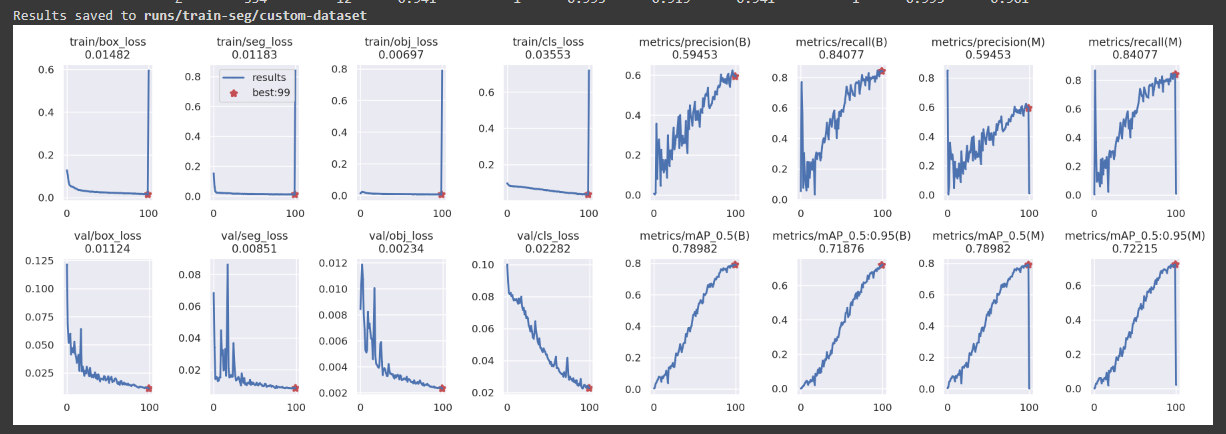

I re-ran it and this is the result:

2024-04-01 12:12:50.193228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 12:12:50.193330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 12:12:50.297918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, o

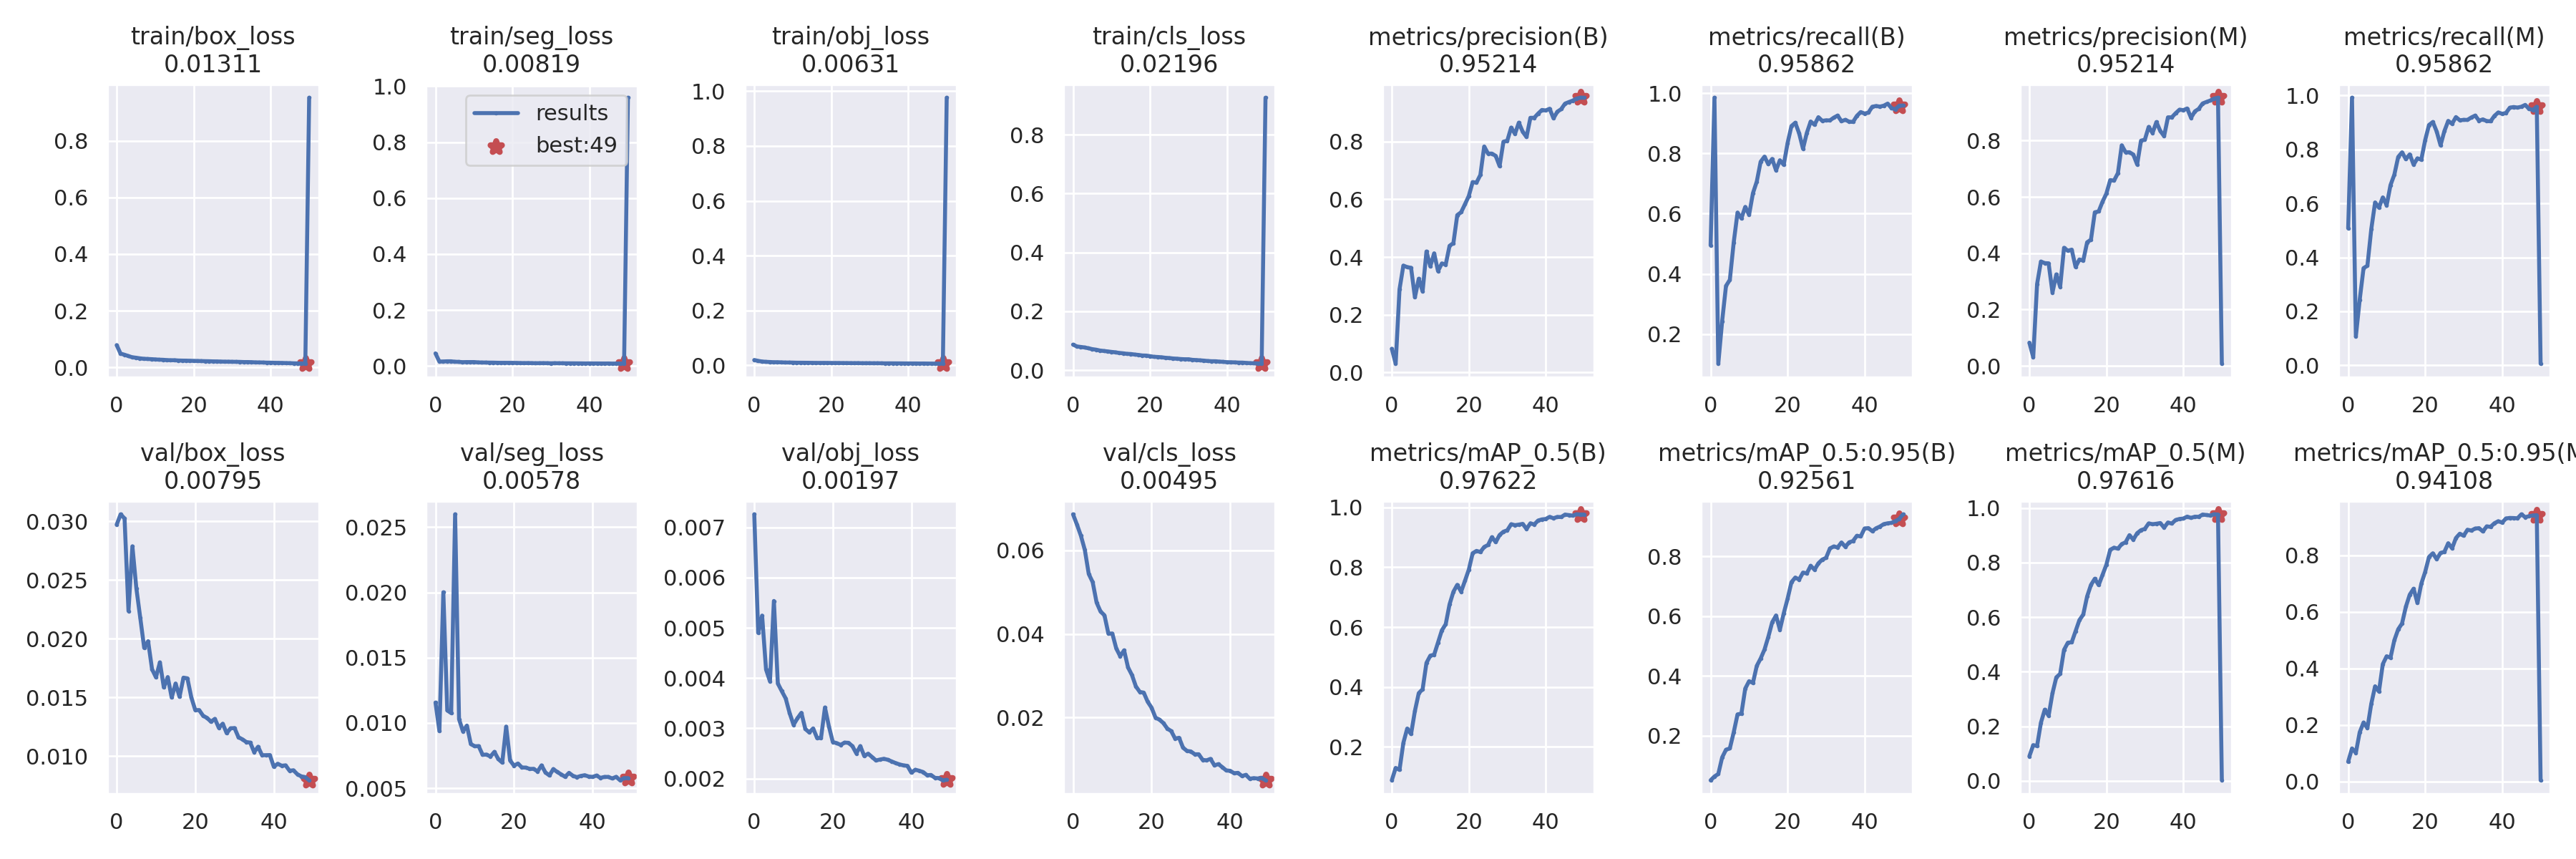

In [ ]:
!python segment/train.py --img 320 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

In [ ]:
!python segment/val.py --weights runs/train-seg/exp/weights/best.pt --data {dataset.location}/data.yaml --img 320


segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, weights=['runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-61/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:08<00:00,  1.23it/s]
                   all        334        335      0.952      0.959      0.976      0.926      0.95

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg: 320x320 1 A, 1 E, 7.6ms
Speed: 0.3ms pre-process, 7.6ms inference, 880.4

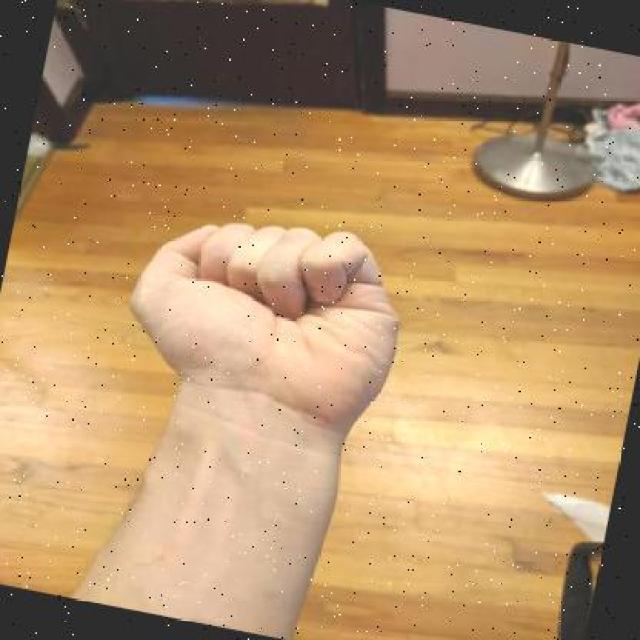

In [ ]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source '/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg'
display.Image(filename=f'/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg', width=600)

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/runs/predict-seg/exp3/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/yolov5/runs/predict-seg/exp3/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg: 320x320 (no detections), 6.4ms
Speed: 0.3ms pre-process, 6.4ms inference, 20.2ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/p

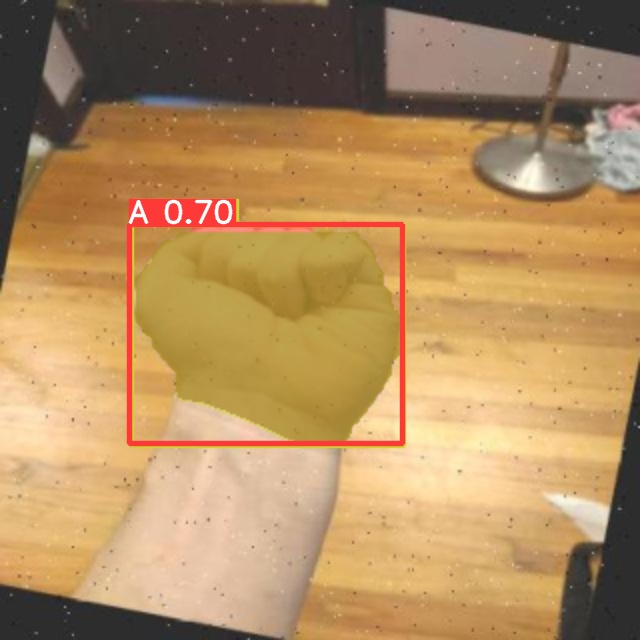

In [ ]:
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source '/content/yolov5/runs/predict-seg/exp3/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg'
display.Image(filename=f'/content/yolov5/runs/predict-seg/exp3/A17_jpg.rf.0c5ed77cb33d1e86fd207b95ce4d6f31.jpg', width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A20_jpg.rf.2a648cae517526cdafdf620340649bb3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A20_jpg.rf.2a648cae517526cdafdf620340649bb3.jpg: 320x320 1 A, 7.2ms
Speed: 0.4ms pre-process, 7.2ms inference, 474.7ms N

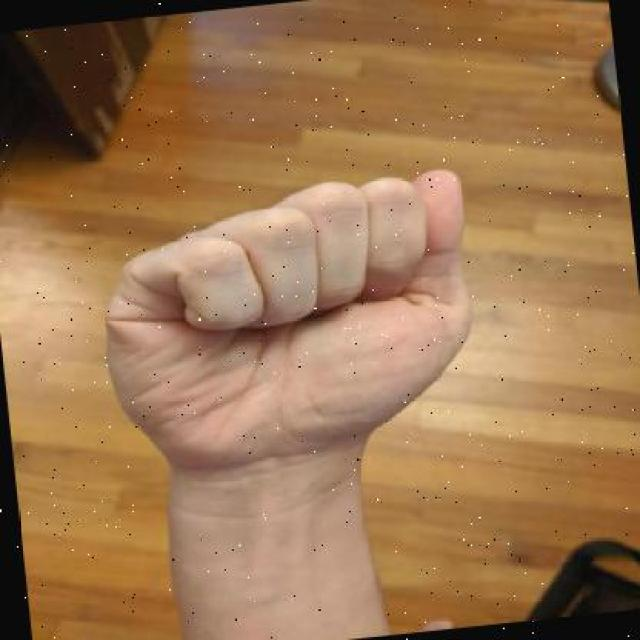

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp/weights/best.pt --source '/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A20_jpg.rf.2a648cae517526cdafdf620340649bb3.jpg' --name custom-dataset
display.Image(filename=f'/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/A20_jpg.rf.2a648cae517526cdafdf620340649bb3.jpg', width=600)